# Imports

In [2]:
import pandas as pd 
import numpy as np

### Base com atributos numéricos

In [9]:
# Base tirada de https://archive.ics.uci.edu/ml/datasets/Teaching+Assistant+Evaluation

tae_metric_classes = {1:"Low", 2:"Medium", 3:"High"}

tae = pd.read_csv('databases/tae.csv',
                      header=None, 
                      names=[
                            "Native English speaker",
                            "Course instructor",
                            "Course",
                            "Semester",
                            "Class size",
                            "Class"
                            ])


tae

,Native English speaker,Course instructor,Course,Semester,Class size,Class
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
...,...,...,...,...,...,...
146,2,3,2,2,26,1
147,2,10,3,2,12,1
148,1,18,7,2,48,1
149,2,22,1,2,51,1


In [4]:
tae.describe()

,Native English speaker,Course instructor,Course,Semester,Class size,Class
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [5]:
tae.dtypes

Native English speaker    int64
Course instructor         int64
Course                    int64
Semester                  int64
Class size                int64
Class                     int64
dtype: object

In [5]:
# tae = pd.get_dummies(tae, 
#                          columns=[], 
#                          prefix=[])
# tae

In [10]:
from sklearn.preprocessing import OrdinalEncoder
atributos = [
                            "Native English speaker",
                            "Course instructor",
                            "Course",
                            "Semester",
                            "Class size"
                      ]
enc = OrdinalEncoder()
enc.fit(tae[atributos])
tae[atributos] = enc.transform(tae[atributos])
tae

,Native English speaker,Course instructor,Course,Semester,Class size,Class
0,0.0,22.0,2.0,0.0,13.0,3
1,1.0,14.0,2.0,0.0,11.0,3
2,0.0,22.0,2.0,1.0,40.0,3
3,0.0,4.0,1.0,1.0,27.0,3
4,1.0,6.0,10.0,1.0,43.0,3
...,...,...,...,...,...,...
146,1.0,2.0,1.0,1.0,20.0,1
147,1.0,9.0,2.0,1.0,6.0,1
148,0.0,17.0,6.0,1.0,39.0,1
149,1.0,21.0,0.0,1.0,41.0,1


In [11]:
from sklearn.preprocessing import StandardScaler

tae[atributos] = StandardScaler().fit_transform(tae[atributos])
#jogo_da_velha = pd.DataFrame(jogo_da_velha)

tae

,Native English speaker,Course instructor,Course,Semester,Class size,Class
0,-2.051072,1.375485,-0.729359,-2.359071,-0.712199,3
1,0.487550,0.199557,-0.729359,-2.359071,-0.885514,3
2,-2.051072,1.375485,-0.729359,0.423896,1.627555,3
3,-2.051072,-1.270352,-0.872203,0.423896,0.501007,3
4,0.487550,-0.976370,0.413398,0.423896,1.887527,3
...,...,...,...,...,...,...
146,0.487550,-1.564334,-0.872203,0.423896,-0.105596,1
147,0.487550,-0.535398,-0.729359,0.423896,-1.318801,1
148,-2.051072,0.640530,-0.157980,0.423896,1.540897,1
149,0.487550,1.228494,-1.015048,0.423896,1.714212,1


## Clusterizando Teaching Assistant Evaluation
##### Selecionando o X e y

In [12]:
# Selecionando o X e o y


X = tae.iloc[:, :5].values # Atributos do Data Frame do Pandas
y = tae.iloc[:, 5:].values # Classes do Data Frame do Pandas

y = np.squeeze(y) # Converter em um unico Array quando usar o dataFrame do Pandas

y_unique = np.unique(y)

# Atualizando o eixo Y
# for i in range(len(y_unique)):
#     y = [i if y_unique[i] == e else e for e in y]
# y = np.array(y)

y_unique # Valores unicos de classes

array([1, 2, 3])

##### Exemplos de Algoritmos para cálculos de distâncias

In [13]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity


eucl = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'euclidean')

manh = pairwise_distances(X[0].reshape(1, -1), X[1].reshape(1, -1), 'manhattan')

ass_cos = cosine_similarity(X[0].reshape(1, -1), X[1].reshape(1, -1))

print("Euclidiano: ", eucl)
print("Manhattan: ", manh)
print("Assimilaridade do Cosseno: ", ass_cos)

Euclidiano:  [[2.80311353]]
Manhattan:  [[3.8878647]]
Assimilaridade do Cosseno:  [[0.62942044]]


##### PCA

Projecting 5-dimensional data to 2D


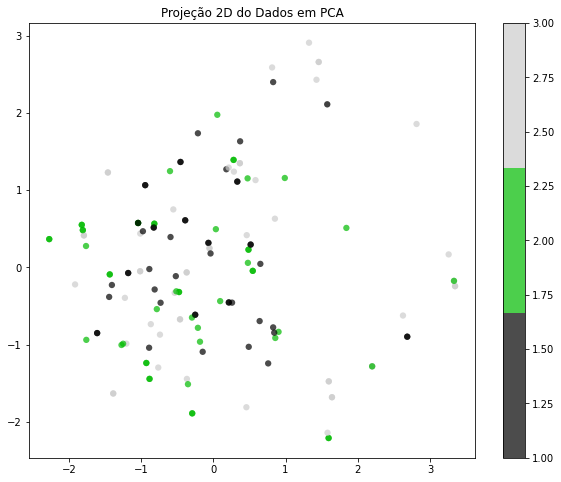

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

def plot_g(pyplot, title, colors, n_classes):
    pyplot.scatter(X_reduced[:, 0], X_reduced[:, 1], c=colors, 
             edgecolor='none', alpha=0.7, s=40,
             cmap=plt.cm.get_cmap('nipy_spectral', n_classes)
           )
    pyplot.colorbar()
    pyplot.title(title)

plt.figure(figsize=(10, 8)) # Tamanho da Figura
plot_g(plt, 'Projeção 2D do Dados em PCA', y, len(y_unique))
plt.show()


##### KMeans com a base original e com o PCA

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(y_unique)).fit(X)
labels = kmeans.labels_

kmeans_PCA = KMeans(n_clusters=len(y_unique)).fit(X_reduced)
labels_PCA = kmeans_PCA.labels_


##### Plotando os Gráficos 

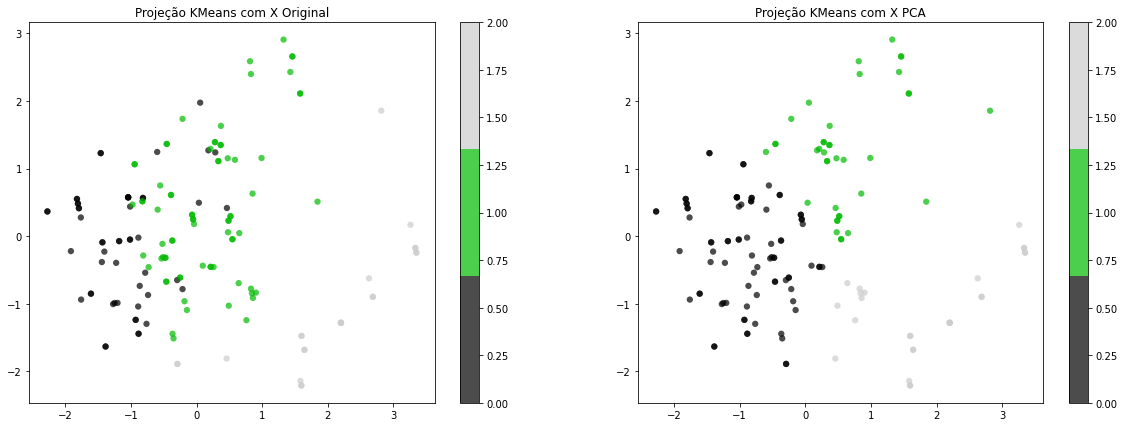

In [16]:

plt.figure(figsize=(10*2, 7))

plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X Original')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_PCA, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', len(y_unique)))
plt.colorbar()
plt.title('Projeção KMeans com X PCA')

plt.show()

##### Comparando o KMeans, KMeans PCA e o y Original

In [17]:
print("Comparação: ")

unique, counts = np.unique(labels, return_counts=True) # KMeans
print("KMeans X: " , dict(zip(unique, counts)))

unique, counts = np.unique(labels_PCA, return_counts=True) # KMeans PCA
print("KM.. PCA: ", dict(zip(unique, counts)))

unique, counts = np.unique(y, return_counts=True) # Original
print("Original: ", dict(zip(unique, counts)))


Comparação: 
KMeans X:  {0: 54, 1: 74, 2: 23}
KM.. PCA:  {0: 85, 1: 39, 2: 27}
Original:  {1: 49, 2: 50, 3: 52}
